In [1]:
%matplotlib inline
from copy import deepcopy
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

In [3]:
data = pd.read_csv('xclara.csv')
print(data.shape)
data.head()

(3000, 2)


,V1,V2
0,2.072345,-3.241693
1,17.936710,15.784810
2,1.083576,7.319176
3,11.120670,14.406780
4,23.711550,2.557729


C:\Users\USER\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1288: UserWarning: findfont: Font family ['Gulim'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


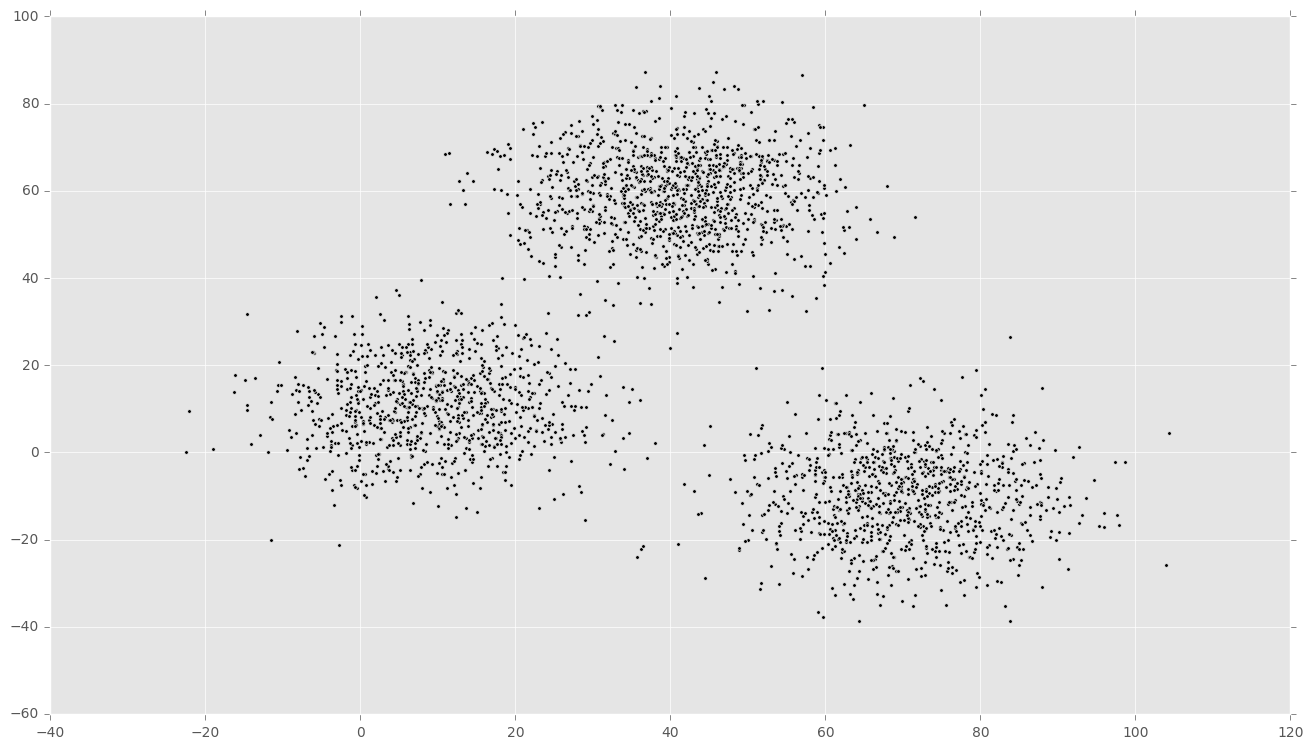

In [4]:
f1 = data['V1'].values
f2 = data['V2'].values
X = np.array(list(zip(f1, f2)))
plt.scatter(f1, f2, c='black', s=7)

In [5]:
#위의 점들을 보고 
#k-means를 이용하여 군집분석을 하여 봅시다. (3개정도면 적당하겠네요) 어떻게 하면 될까요? 

In [14]:
from sklearn.cluster import KMeans

# K-MEANS 군집모델 생성
kmeans = KMeans(n_clusters=3)

# 모델의 훈련
kmeans = kmeans.fit(X)

# 군집의 예측 
labels = kmeans.predict(X)

# 군집의 중심좌표
centroids = kmeans.cluster_centers_

In [15]:
centroids

array([[ 40.68362784,  59.71589274],
       [ 69.92418447, -10.11964119],
       [  9.4780459 ,  10.686052  ]])

In [16]:
labels

array([2, 2, 2, ..., 1, 1, 1])

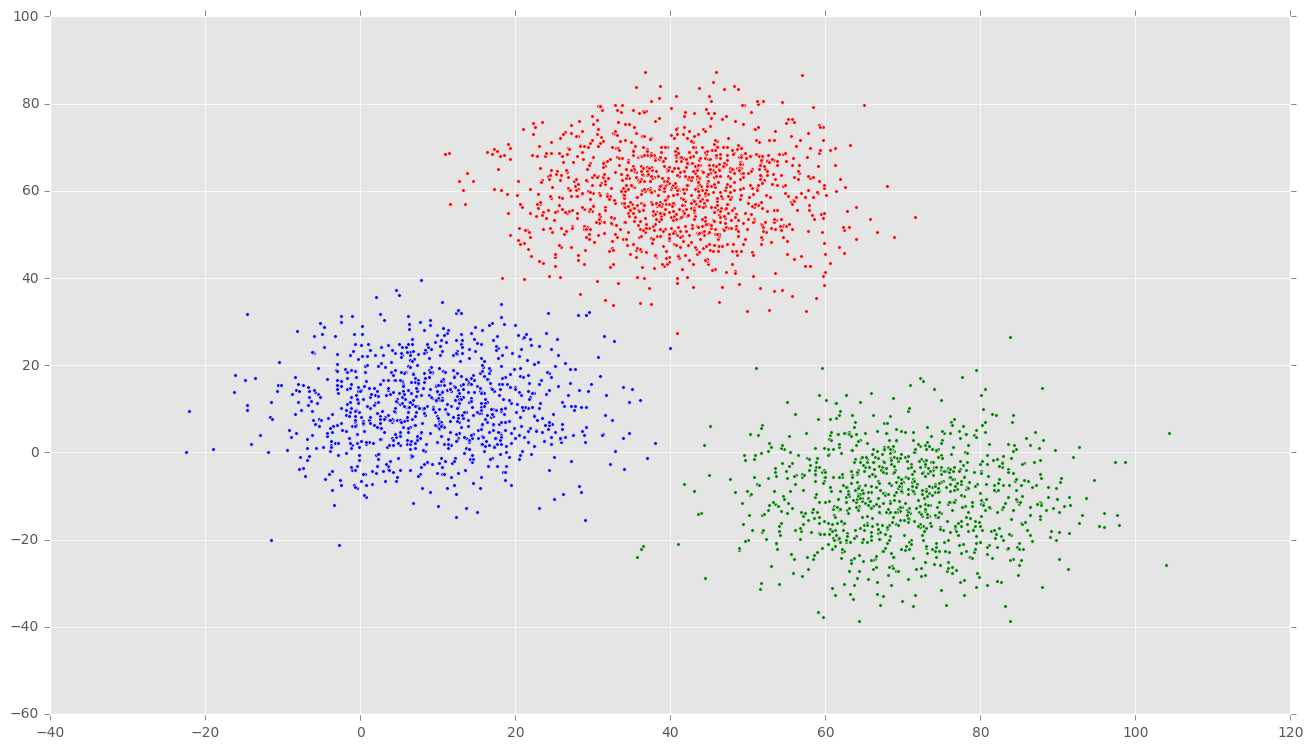

In [17]:
#군집마다 색깔을 입혀봅시다. 
colors = ['r', 'g', 'b']
fig, ax = plt.subplots()

for i in range(3):
        points = np.array([X[j] for j in range(len(X)) if labels[j] == i])
        ax.scatter(points[:, 0], points[:, 1], s=7, c=colors[i])